# Start Here

In [1]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.3MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# with open('/content/drive/My Drive/spacex_launch_data.csv', 'w') as f:
#   f.write('Hello Google Drive!')

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500) # shows all
pd.set_option('display.width', 1000)

In [0]:
df = pd.read_csv('/content/drive/My Drive/spacex_launch_data.csv', na_values="Classified")

In [0]:
df

In [0]:
import datetime
import time
df2 = df.copy()
# df['col'] = pd.to_datetime(df['col'])

df2.Date = pd.to_datetime(df.Date)
# df2['Time (UTC)'] = pd.to_datetime(df2['Time (UTC)'])
# df2

In [0]:
df2.dtypes

In [0]:
df2.isnull().sum()

In [0]:
df2.iloc[0,6] = 0
df2.iloc[1,6] = 0
# df2.head()

In [0]:
df2.shape

(79, 11)

In [0]:
df3 = df2.dropna()

In [0]:
df3.shape

(77, 11)

In [0]:
df3.dtypes

In [0]:
df3.Customer.value_counts(dropna=False)

NASA (CRS)                              16
Iridium Communications                   7
U.S. Air Force                           5
SES                                      5
SpaceX                                   3
Arabsat                                  3
SKY Perfect JSAT Group                   2
AsiaSat                                  2
ABS Eutelsat                             2
Telesat                                  2
Orbcomm                                  2
Thaicom                                  2
PSN SpaceIL / IAI Air Force Research     1
NASA (COTS) NRO                          1
KT Corporation                           1
NASA (COTS)                              1
Bulsatcom                                1
U.S. Air Force NASA NOAA                 1
Inmarsat                                 1
Canadian Space Agency                    1
NASA (CCD)                               1
Iridium Communications GFZ • NASA        1
NSPO                                     1
Telkom Indo

In [0]:
df3.Customer.unique()

In [7]:
def priv_pub(group):
  if group in ['NASA (COTS) NRO', 'NASA (COTS)', 'NASA (CRS)', 'U.S. Air Force NASA NOAA', 
               'Turkmenistan National Space Agency', 'NASA (LSP) NOAA CNES',
              'U.S. Air Force', 'NASA (LSP)','NASA (CCD)', 'Arabsat', 'NASA', 
               'Canadian Space Agency', 'CONAE']:
    return 'Public'
  else:
    return 'Private'

df3['PubPriv'] = df3['Customer'].apply(priv_pub)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
def fail_succ_MO(group):
  if group == 'Failure  (in flight)':
    return False
  else:
    return True
  
df3['Mission Success'] = df3['Mission Outcome'].apply(fail_succ_MO)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [9]:
def fail_succ_LO(group):
  if group in ['Failure   (parachute)', 'Failure  (drone ship)', 'Failure (drone ship)', 
               'Failure (drone ship)', 'Failure  (ground pad)', 'Failure   (drone ship)']:
    return False
  else:
    return True
#   print(type(group))
#   if group == 'Failure  (in flight)':
#     return False
#   else:
#     return True
  

# df3 = df3.drop('Landing Success', 1)
df3['Landing Success'] = df3['Landing Outcome'].apply(fail_succ_LO)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [0]:
df3['Mission Outcome'].unique()

In [0]:
df3 = df3.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df3['Mission Outcome'].unique()

array(['Success', 'Failure  (in flight)',
       'Success  (payload\xa0status unclear)'], dtype=object)

In [0]:
df3['Landing Outcome'].unique()

array(['Failure   (parachute)', 'No attempt', 'Uncontrolled (ocean)',
       'Controlled (ocean)', 'Failure  (drone ship)',
       'Precluded  (drone ship)', 'Success  (ground pad)',
       'Failure (drone ship)', 'Success  (drone ship)',
       'Success (drone ship)', 'Success (ground pad)',
       'Success (ground pad), Failure (drone ship), Success (ground pad)',
       'Success   (drone ship)', 'Failure  (ground pad)',
       'Failure   (drone ship)', 'Success   (ground pad)'], dtype=object)

In [41]:
df3.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome,PubPriv,Mission Success,Landing Success
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Success,Failure (parachute),Private,True,False
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),Public,True,False
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),Success,No attempt,Public,True,True
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),Success,No attempt,Public,True,True
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),Success,No attempt,Public,True,True


Possible viz


1.   launch date frequency (is it increasing)
2.   launches distrbuted by location
3. Is there a correlation between location and failure?
4. correlation between payload size and failure
5. payload customers and size and frequecy of being a customer
6. landing successes vs year (more attempts at retrieval?)

Data manipulation:

1. column of (Fail, Success, no attempt)
2. column of customers (private, government)

Outline:



1.   Intro with some SpaceX history
2. Increasing amount of business/payloads (include payload mass viz)
3.   Public vs Private customers (include 'who are customers" and pubpriv barchart viz)
4. Profitability
>a. different charges based on customer type (include viz)

>>b. costs. Is spacex profitable?








In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 78
Data columns (total 14 columns):
Flight Number        77 non-null object
Date                 77 non-null datetime64[ns]
Time (UTC)           77 non-null object
Booster Version      77 non-null object
Launch Site          77 non-null object
Payload              77 non-null object
Payload Mass (kg)    77 non-null float64
Orbit                77 non-null object
Customer             77 non-null object
Mission Outcome      77 non-null object
Landing Outcome      77 non-null object
PubPriv              77 non-null object
Mission Success      77 non-null bool
Landing Success      77 non-null bool
dtypes: bool(2), datetime64[ns](1), float64(1), object(10)
memory usage: 10.5+ KB


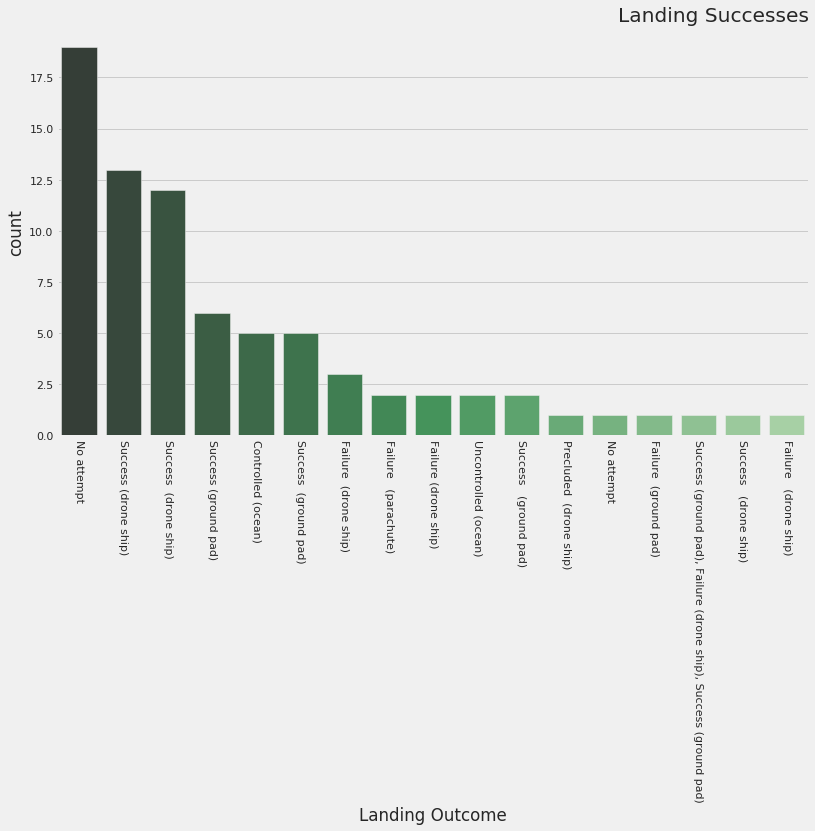

In [24]:
sns.set(rc={'figure.figsize':(12,7)})
plt.style.use('fivethirtyeight')
plt.xticks(rotation=270)
plt.title("Landing Successes", loc='right')
sns.countplot(x="Landing Outcome", data=df3, order=df3['Landing Outcome'].value_counts().index, palette="Greens_d");
plt.savefig('landingsuccess.png', bbox_inches='tight')

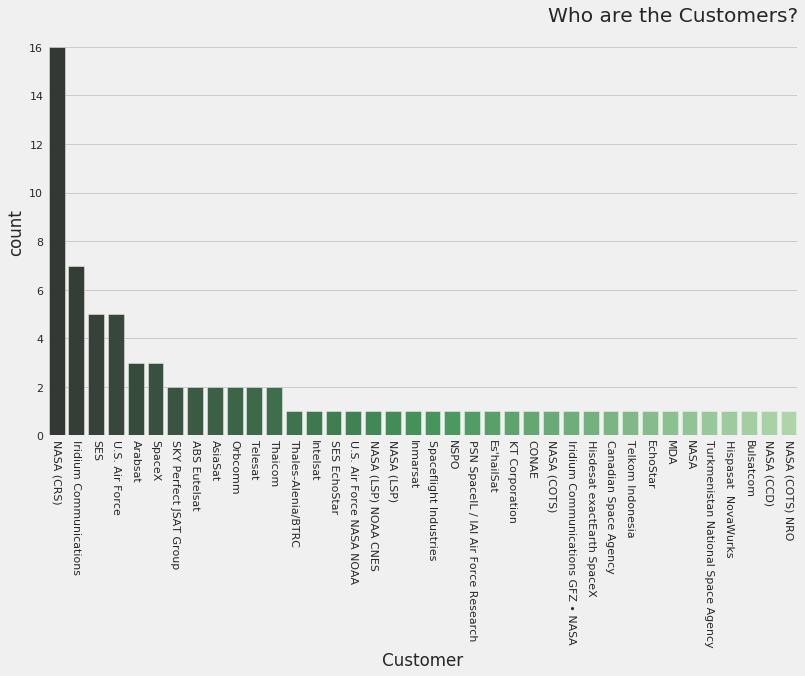

In [25]:
sns.set(rc={'figure.figsize':(12,7)})
# sns.set(rc={'figure.figsize':(15,8)})
plt.style.use('fivethirtyeight')
plt.xticks(rotation=270)
plt.title("Who are the Customers?", loc='right')
sns.countplot(x="Customer", data=df3, order=df3['Customer'].value_counts().index, palette='Greens_d');
plt.savefig('customercount.png', bbox_inches='tight')

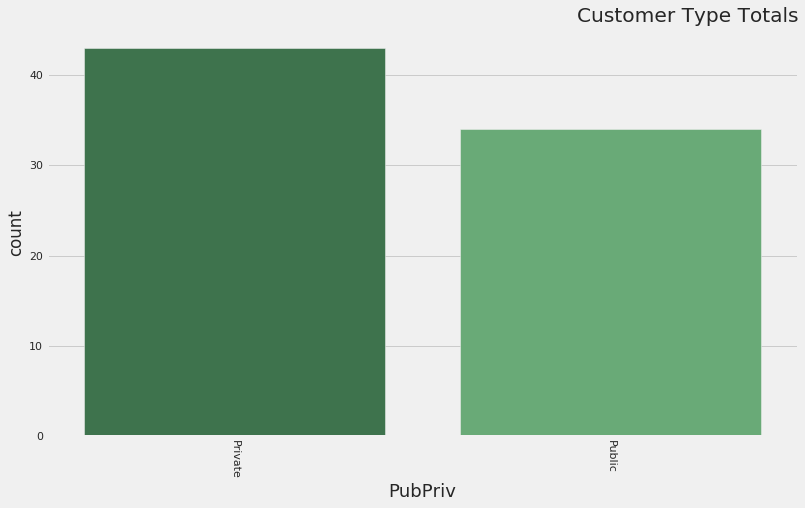

In [26]:
sns.set(rc={'figure.figsize':(12,7)})
# sns.set(rc={'figure.figsize':(15,8)})
plt.style.use('fivethirtyeight')
plt.title("Customer Type Totals", loc='right')
plt.xticks(rotation=270)
plt.xlabel('xlabel', fontsize=18)
sns.countplot(x="PubPriv", data=df3, palette="Greens_d");
plt.savefig('customertypes.png', bbox_inches='tight')

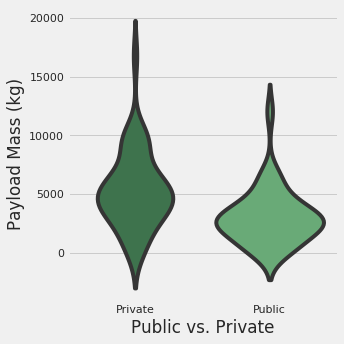

In [27]:
sns.set(rc={'figure.figsize':(12,7)})
# sns.set(rc={'figure.figsize':(15,8)})
plt.style.use('fivethirtyeight')
# sns.title("Customer Type vs. Payload Size", loc='right')
g = sns.catplot(x="PubPriv", y="Payload Mass (kg)", data=df3, palette="Greens_d", kind='violin', inner=None);
g.set_axis_labels("Public vs. Private").set_titles("Customer Type vs. Payload Mass", loc='right');
plt.savefig('payloadmassviolin.png', bbox_inches='tight')

In [0]:
df3.Customer.unique()

array(['SpaceX', 'NASA (COTS) NRO', 'NASA (COTS)', 'NASA (CRS)', 'MDA',
       'SES', 'Thaicom', 'Orbcomm', 'AsiaSat', 'U.S. Air Force NASA NOAA',
       'ABS Eutelsat', 'Turkmenistan National Space Agency',
       'NASA (LSP) NOAA CNES', 'SKY Perfect JSAT Group',
       'Iridium Communications', 'EchoStar', 'Inmarsat', 'Bulsatcom',
       'Intelsat', 'NSPO', 'U.S. Air Force', 'SES EchoStar',
       'KT Corporation', 'Hisdesat exactEarth SpaceX',
       'Hispasat  NovaWurks', 'NASA (LSP)', 'Thales-Alenia/BTRC',
       'Iridium Communications GFZ • NASA', 'Telesat', 'Telkom Indonesia',
       'CONAE', "Es'hailSat", 'Spaceflight Industries',
       'PSN SpaceIL / IAI Air Force Research', 'NASA (CCD)', 'Arabsat',
       'NASA', 'Canadian Space Agency'], dtype=object)

In [0]:
sorted(df3["Payload Mass (kg)"].unique())

In [12]:
payload_bins = pd.cut(df3['Payload Mass (kg)'],10)
#pd.crosstab(df3['Customer'], payload_bins) 
pd.crosstab(df3.PubPriv, payload_bins)

Payload Mass (kg),"(-16.8, 1680.0]","(1680.0, 3360.0]","(3360.0, 5040.0]","(5040.0, 6720.0]","(6720.0, 8400.0]","(8400.0, 10080.0]","(11760.0, 13440.0]","(15120.0, 16800.0]"
PubPriv,,,,,,,,
Private,5,6,12,10,3,7,0,1
Public,7,15,7,3,0,0,1,0


In [0]:
pd.crosstab(df3.PubPriv, df3['Mission Success'])

Mission Success,False,True
PubPriv,,
Private,0,44
Public,1,32


In [0]:
pd.crosstab(df3.PubPriv, df3['Landing Success'])

Landing Success,False,True
PubPriv,,
Private,3,41
Public,6,27


In [0]:
pd.crosstab(df3.PubPriv, df3['Date'].dt.year, margins=True, normalize=True)

Date,2010,2012,2013,2014,2015,2016,2017,2018,2019,All
PubPriv,,,,,,,,,,
Private,0.012987,0.000000,0.025974,0.051948,0.025974,0.064935,0.155844,0.194805,0.038961,0.571429
Public,0.012987,0.025974,0.012987,0.025974,0.064935,0.038961,0.064935,0.064935,0.116883,0.428571
All,0.025974,0.025974,0.038961,0.077922,0.090909,0.103896,0.220779,0.259740,0.155844,1.000000


In [0]:
pd.crosstab(df3.PubPriv, df3['Date'].dt.month, margins=True, normalize=True)

Date,1,2,3,4,5,6,7,8,9,10,11,12,All
PubPriv,,,,,,,,,,,,,
Private,0.051948,0.038961,0.077922,0.000000,0.077922,0.064935,0.051948,0.051948,0.038961,0.051948,0.012987,0.051948,0.571429
Public,0.025974,0.025974,0.025974,0.116883,0.025974,0.090909,0.012987,0.012987,0.025974,0.012987,0.000000,0.051948,0.428571
All,0.077922,0.064935,0.103896,0.116883,0.103896,0.155844,0.064935,0.064935,0.064935,0.064935,0.012987,0.103896,1.000000


In [0]:
pd.crosstab(df3['Launch Site'], df3['Date'].dt.year, margins=True, normalize=True)

Date,2010,2012,2013,2014,2015,2016,2017,2018,2019,All
Launch Site,,,,,,,,,,
CCAFS LC-40,0.025974,0.025974,0.025974,0.077922,0.090909,0.090909,0.000000,0.000000,0.000000,0.337662
CCAFS SLC-40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.064935,0.000000,0.077922
CCAFSSLC-40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077922,0.038961,0.116883
KSC LC-39A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.025974,0.000000,0.168831
KSCLC-39A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.090909,0.103896
VAFB SLC-4E,0.000000,0.000000,0.012987,0.000000,0.000000,0.012987,0.064935,0.038961,0.000000,0.129870
VAFBSLC-4E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038961,0.025974,0.064935
All,0.025974,0.025974,0.038961,0.077922,0.090909,0.103896,0.220779,0.259740,0.155844,1.000000


In [0]:
pd.crosstab(df3['Launch Site'], df3['Date'].dt.month, margins=True, normalize=True)

Date,1,2,3,4,5,6,7,8,9,10,11,12,All
Launch Site,,,,,,,,,,,,,
CCAFS LC-40,0.025974,0.012987,0.038961,0.051948,0.038961,0.038961,0.025974,0.025974,0.025974,0.012987,0.000000,0.038961,0.337662
CCAFS SLC-40,0.012987,0.000000,0.012987,0.025974,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.077922
CCAFSSLC-40,0.000000,0.012987,0.000000,0.000000,0.025974,0.012987,0.012987,0.012987,0.012987,0.000000,0.000000,0.025974,0.116883
KSC LC-39A,0.000000,0.025974,0.025974,0.000000,0.025974,0.025974,0.012987,0.012987,0.012987,0.025974,0.000000,0.000000,0.168831
KSCLC-39A,0.000000,0.000000,0.012987,0.038961,0.000000,0.038961,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.103896
VAFB SLC-4E,0.025974,0.012987,0.012987,0.000000,0.012987,0.012987,0.000000,0.012987,0.012987,0.012987,0.000000,0.012987,0.129870
VAFBSLC-4E,0.012987,0.000000,0.000000,0.000000,0.000000,0.012987,0.012987,0.000000,0.000000,0.012987,0.000000,0.012987,0.064935
All,0.077922,0.064935,0.103896,0.116883,0.103896,0.155844,0.064935,0.064935,0.064935,0.064935,0.012987,0.103896,1.000000


In [0]:
pd.crosstab(df3['Booster Version'], payload_bins) #, margins=True, normalize=True)

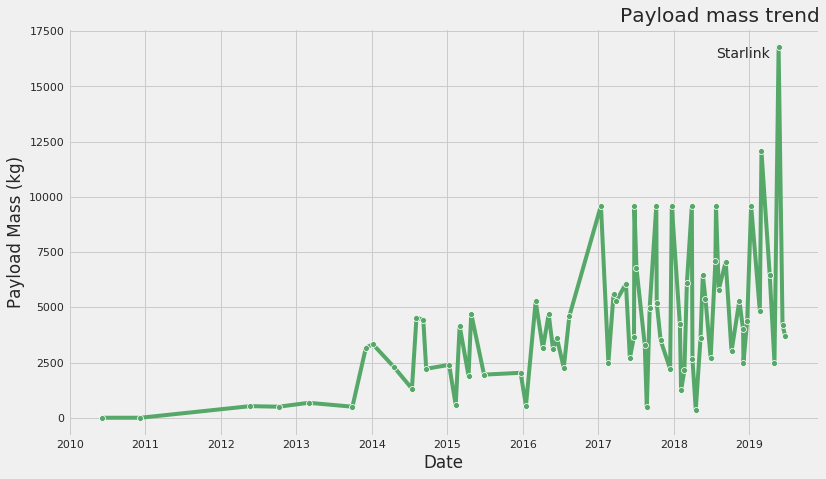

In [28]:
fig = plt.figure(figsize=(12,7))
plt.style.use('fivethirtyeight')
plt.title("Payload mass trend", loc='right')
# sns.set_style('fivethirtyeight')
# sns.lineplot(df3['Date'], df3['Payload Mass (kg)'], markers=True, )
# sns.regplot(x='Date',y='Payload Mass (kg)', data=df3, fit_reg=True)
# ax = fig.add_subplot(111)
fig.text(.83, .82, s="Starlink")
sns.lineplot(x='Date', y='Payload Mass (kg)', data=df3, markers=True, marker='o', color='g') ;
plt.savefig('payloadtrend.png', bbox_inches='tight')

In [0]:
from scipy import stats

In [28]:
ms = pd.crosstab(df3.PubPriv, df3['Mission Success'])
print(ms)
# chisquare(np.array(ms.values), axis='None')
chi_squared, p_value, dof, expected = stats.chi2_contingency(ms)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Mission Success  False  True 
PubPriv                      
Private              0     44
Public               1     32
Chi-Squared: 0.02110745614035086
P-value: 0.8844866047688582
Degrees of Freedom: 1
Expected: 
 [[ 0.57142857 43.42857143]
 [ 0.42857143 32.57142857]]


In [31]:
ls = pd.crosstab(df3.PubPriv, df3['Landing Success'])
print(ls)
# chisquare(np.array(ms.values), axis='None')
chi_squared, p_value, dof, expected = stats.chi2_contingency(ls)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Landing Success  False  True 
PubPriv                      
Private              3     41
Public               6     27
Chi-Squared: 1.3866081154684098
P-value: 0.2389787438736849
Degrees of Freedom: 1
Expected: 
 [[ 5.14285714 38.85714286]
 [ 3.85714286 29.14285714]]


In [0]:
df3.columns

Index(['Flight Number', 'Date', 'Time (UTC)', 'Booster Version', 'Launch Site', 'Payload', 'Payload Mass (kg)', 'Orbit', 'Customer', 'Mission Outcome', 'Landing Outcome', 'PubPriv', 'Mission Success', 'Landing Success'], dtype='object')

In [33]:
skipcolumns = ['Flight Number', 'Time (UTC)', 'Mission Outcome', 'Landing Outcome', 'PubPriv', 'Mission Success', 'Landing Success']
for column in df3:
  if column in skipcolumns: # only look at categorical variables 
    continue 
  #create contingency table crosstabs
  ct = pd.crosstab(df3['Landing Success'], df3[column])
  chi2, p_value, dof, expected = stats.chi2_contingency(ct.values)
  print("For the categories of ", column, "and Landing Success:\n Chi^2 is", chi2, " and the p-value is", p_value)

For the category of  Date and Landing Success:
 Chi^2 is 70.54139433551198  and the p-value is 0.5265876672737101
For the category of  Booster Version and Landing Success:
 Chi^2 is 77.0  and the p-value is 0.32179946180543684
For the category of  Launch Site and Landing Success:
 Chi^2 is 6.479064367912407  and the p-value is 0.3717145423050601
For the category of  Payload and Landing Success:
 Chi^2 is 70.54139433551198  and the p-value is 0.5265876672737101
For the category of  Payload Mass (kg) and Landing Success:
 Chi^2 is 65.69744008714594  and the p-value is 0.35001388071669753
For the category of  Orbit and Landing Success:
 Chi^2 is 7.616122004357298  and the p-value is 0.5732456357562299
For the category of  Customer and Landing Success:
 Chi^2 is 26.58250953159042  and the p-value is 0.8976746451081468


In [35]:
skipcolumns = ['Flight Number', 'Time (UTC)', 'Mission Outcome', 'Landing Outcome', 'PubPriv', 'Mission Success', 'Landing Success']
for column in df3:
  if column in skipcolumns: # only look at categorical variables 
    continue 
  #create contingency table crosstabs
  ct = pd.crosstab(df3['Mission Success'], df3[column])
  chi2, p_value, dof, expected = stats.chi2_contingency(ct.values)
  print("For the categories of ", column, "and Mission Success:\n Chi^2 is", chi2, " and the p-value is", p_value)

For the categories of  Date and Mission Success:
 Chi^2 is 76.99999999999997  and the p-value is 0.32179946180543767
For the categories of  Booster Version and Mission Success:
 Chi^2 is 77.0  and the p-value is 0.32179946180543684
For the categories of  Launch Site and Mission Success:
 Chi^2 is 1.9873481781376519  and the p-value is 0.9208585010979066
For the categories of  Payload and Mission Success:
 Chi^2 is 77.0  and the p-value is 0.32179946180543684
For the categories of  Payload Mass (kg) and Mission Success:
 Chi^2 is 76.99999999999993  and the p-value is 0.0950387008241219
For the categories of  Orbit and Mission Success:
 Chi^2 is 2.8874999999999993  and the p-value is 0.9685885129886487
For the categories of  Customer and Mission Success:
 Chi^2 is 3.862664473684208  and the p-value is 0.9999999999988733


In [36]:
skipcolumns = ['Flight Number', 'Time (UTC)', 'Mission Outcome', 'Landing Outcome', 'PubPriv', 'Mission Success', 'Landing Success']
for column in df3:
  if column in skipcolumns: # only look at categorical variables 
    continue 
  #create contingency table crosstabs
  ct = pd.crosstab(df3['PubPriv'], df3[column])
  chi2, p_value, dof, expected = stats.chi2_contingency(ct.values)
  print("For the categories of ", column, "and Customer Type:\n Chi^2 is", chi2, " and the p-value is", p_value)

For the categories of  Date and Customer Type:
 Chi^2 is 77.0  and the p-value is 0.32179946180543684
For the categories of  Booster Version and Customer Type:
 Chi^2 is 73.73333333333332  and the p-value is 0.4212161457157325
For the categories of  Launch Site and Customer Type:
 Chi^2 is 13.436983618233619  and the p-value is 0.036598251564632416
For the categories of  Payload and Customer Type:
 Chi^2 is 77.0  and the p-value is 0.32179946180543684
For the categories of  Payload Mass (kg) and Customer Type:
 Chi^2 is 72.91666666666669  and the p-value is 0.16178167647776806
For the categories of  Orbit and Customer Type:
 Chi^2 is 53.74444444444444  and the p-value is 2.1111856025685524e-08
For the categories of  Customer and Customer Type:
 Chi^2 is 77.0  and the p-value is 0.0001253424062437993


In [12]:
orbit_ct = pd.crosstab(df3.PubPriv, df3['Orbit'], margins=True)
orbit_ct

Orbit,GTO,HEO,Heliocentric 0.99–1.67 AU (close to Mars transfer orbit),LEO,LEO (ISS),LEO / MEO,MEO,Polar LEO,SSO,Sun–Earth L1,All
PubPriv,,,,,,,,,,,
Private,26,0,1,5,0,0,0,8,3,0,43
Public,4,1,0,2,20,3,1,0,2,1,34
All,30,1,1,7,20,3,1,8,5,1,77


In [39]:
df3.Orbit.unique()

array(['LEO', 'LEO (ISS)', 'Polar LEO', 'GTO', 'Sun–Earth L1', 'SSO',
       'Heliocentric 0.99–1.67 AU  (close to Mars transfer orbit)', 'HEO',
       'MEO', 'LEO / MEO'], dtype=object)

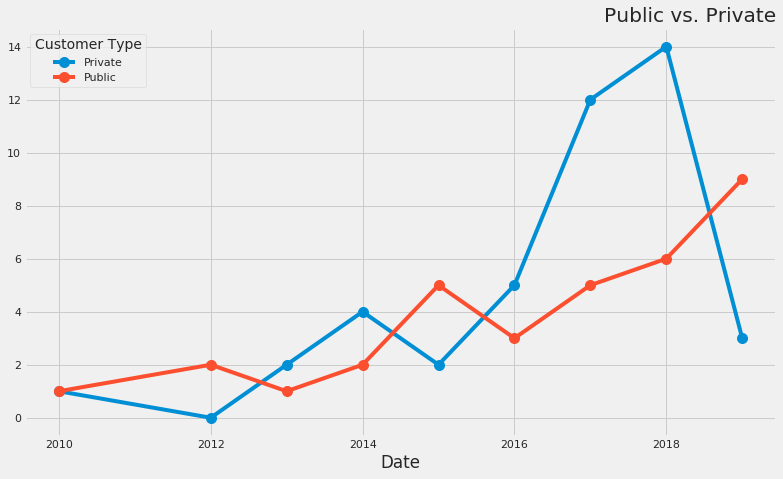

In [30]:
frequency = pd.crosstab(df3['Date'].dt.year, df3.PubPriv)
plt.style.use('fivethirtyeight')
frequency.plot.line(marker='o', markersize=10)
plt.legend(title='Customer Type')
plt.title("Public vs. Private", loc='right')
plt.savefig('customertypebyyear.png', bbox_inches='tight')
plt.show()